In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [2]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 52.2MB/s 
     |████████████████████████████████| 3.8MB 42.4MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [0]:
import matplotlib.pyplot as plt

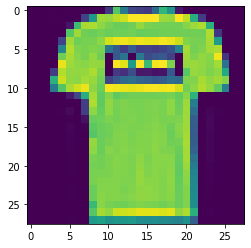

In [10]:
plt.imshow(x_train[1])

In [0]:
# flatten images into one-dimensional vector

num_pixels = x_train.shape[1] * x_train.shape[2] # find size of one-dimensional vector

x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32') # flatten training images
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32') # flatten test images

In [0]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [14]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [0]:
def classification_model():
  model=Sequential()
  model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [19]:
model=classification_model()

#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=2)

#scores model
scores=model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 14s - loss: 0.4740 - accuracy: 0.8287 - val_loss: 0.3978 - val_accuracy: 0.8487
Epoch 2/10
60000/60000 - 13s - loss: 0.3574 - accuracy: 0.8697 - val_loss: 0.3569 - val_accuracy: 0.8686
Epoch 3/10
60000/60000 - 13s - loss: 0.3227 - accuracy: 0.8824 - val_loss: 0.3563 - val_accuracy: 0.8726
Epoch 4/10
60000/60000 - 13s - loss: 0.2981 - accuracy: 0.8897 - val_loss: 0.3666 - val_accuracy: 0.8685
Epoch 5/10
60000/60000 - 13s - loss: 0.2783 - accuracy: 0.8956 - val_loss: 0.3327 - val_accuracy: 0.8803
Epoch 6/10
60000/60000 - 13s - loss: 0.2643 - accuracy: 0.9014 - val_loss: 0.3257 - val_accuracy: 0.8815
Epoch 7/10
60000/60000 - 13s - loss: 0.2517 - accuracy: 0.9066 - val_loss: 0.3330 - val_accuracy: 0.8807
Epoch 8/10
60000/60000 - 13s - loss: 0.2392 - accuracy: 0.9095 - val_loss: 0.3397 - val_accuracy: 0.8838
Epoch 9/10
60000/60000 - 13s - loss: 0.2286 - accuracy: 0.9135 - val_loss: 0.3404 - val_accuracy: 0.8856
Epoch

In [20]:
scores

[0.321397017288208, 0.891]